## 1. Introdução

*This notebook is written in Portuguese. If you're interested in an English version, feel free to reach out.*

Neste notebook, realizo uma **Análise Exploratória de Dados (EDA)** sobre um dataset de admissões em um programa de MBA.

O objetivo é:
1. Entender o perfil dos candidatos;
2. Identificar padrões de aprovação; e
3. Levantar hipóteses que possam ser úteis para futuras ações estratégicas como revisão de critérios de seleção, ajustes em campanhas de marketing ou definição de políticas de diversidade.

Escolhi esse dataset por afinidade com o tema (já atuei profissionalmente em três edtechs) e acredito no valor que análises como essa podem ter para apoiar decisões em processos seletivos, estratégias de comunicação e políticas de diversidade.

Link do dataset no Kaggle: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

## 2. Carregamento e limpeza dos dados

In [1]:
# Importando as bibliotecas:

import math
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados:

file_path = r'C:\Users\01\Documents\Dados\Datasets\MBA Admission dataset, Class 2025\MBA.csv'
df = pd.read_csv(file_path)

# Visualizando uma amostra da base de dados:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [2]:
# Entendendo o tamanho da base de dados

print("\n Formato da base de dados:")
print('\n', df.shape)
print('\n')

# Checando valores nulos em cada coluna

print("\n Verificando valores nulos:")
print('\n', df.isnull().sum())
print('\n')


 Formato da base de dados:

 (6194, 10)



 Verificando valores nulos:

 application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64




In [3]:
# Tratando valores nulos na coluna de raça

df['race'] = df['race'].fillna('Not informed')

# Tratando valores nulos na coluna de admissão

df['admission'] = df['admission'].fillna('Deny')

# Verificando alterações

print("\n Verificando tratamento de nulos:")
print('\n', df.isnull().sum())
print('\n')


 Verificando tratamento de nulos:

 application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64




## 3. Análise exploratória

In [4]:
# Verificando o tipo das colunas

print("\n Tipo das colunas:")
print('\n', df.info())
print('\n')

# Verificando estatísticas descritivas das variáveis quantitativas

print("\n Estatística descritiva das variáveis quantitativas:")
print('\n', df.describe())
print('\n')

# Verificando estatísticas descritivas das variáveis qualitativas

print("\n Estatística descritiva das variáveis qualitativas:")
print('\n', df.describe(include='object'))
print('\n')


 Tipo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB

 None



 Estatística descritiva das variáveis quantitativas:

        application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       17

### 3.1. Análise univariada

#### 3.1.1. Variáveis qualitativas

In [5]:
# Verificando distribuição das variáveis qualitativas:

print("Distribuição da coluna 'gender':")
print('\n',df['gender'].value_counts())
print('\n')

print("Distribuição da coluna 'major':")
print('\n',df['major'].value_counts())
print('\n')

print("Distribuição da coluna 'race':")
print('\n',df['race'].value_counts())
print('\n')

print("Distribuição da coluna 'work_industry':")
print('\n',df['work_industry'].value_counts())
print('\n')

print("Distribuição da coluna 'admission':")
print('\n',df['admission'].value_counts())
print('\n')

Distribuição da coluna 'gender':

 gender
Male      3943
Female    2251
Name: count, dtype: int64


Distribuição da coluna 'major':

 major
Humanities    2481
STEM          1875
Business      1838
Name: count, dtype: int64


Distribuição da coluna 'race':

 race
Not informed    1842
White           1456
Asian           1147
Black            916
Hispanic         596
Other            237
Name: count, dtype: int64


Distribuição da coluna 'work_industry':

 work_industry
Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Real Estate               111
Media/Entertainment        59
Retail                     33
Energy                     32
Name: count, dtype: int64


Distribuição da coluna 'admission':

 admission
Deny        5194
Admit        9

In [6]:
# Criando função para plotar gráfico de colunas para cada variável qualitativa

def plot_bar(col):
    counts = df[col].value_counts()
    total = counts.sum()
    max_val = counts.max()    
    plt.figure(figsize=(10, 6))
    
    if col == 'work_industry':
        counts = counts.sort_values(ascending=True)
        ax = counts.plot(kind='barh')
        ax.set_xlim(0, max_val*1.2)
        
        for i, value in enumerate(counts.values):
            pct = value/total * 100
            label = f"{value} ({pct:.1f}%)"
            ax.text(value + max_val * 0.01, i, label, va='center', fontsize=9)
    else:    
        ax = counts.plot(kind='bar')
        ax.set_ylim(0, max_val * 1.2)
        for i, value in enumerate(counts.values):
            pct = value / total * 100
            label = f"{value} ({pct:.1f}%)"
            ax.text(i, value + max_val * 0.015, label, ha='center', va='bottom', fontsize=9)

    plt.title(f"Distribuição da coluna '{col}'")
    plt.xlabel('Frequência' if col == 'work_industry' else col)
    plt.ylabel(col if col == 'work_industry' else 'Frequência')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

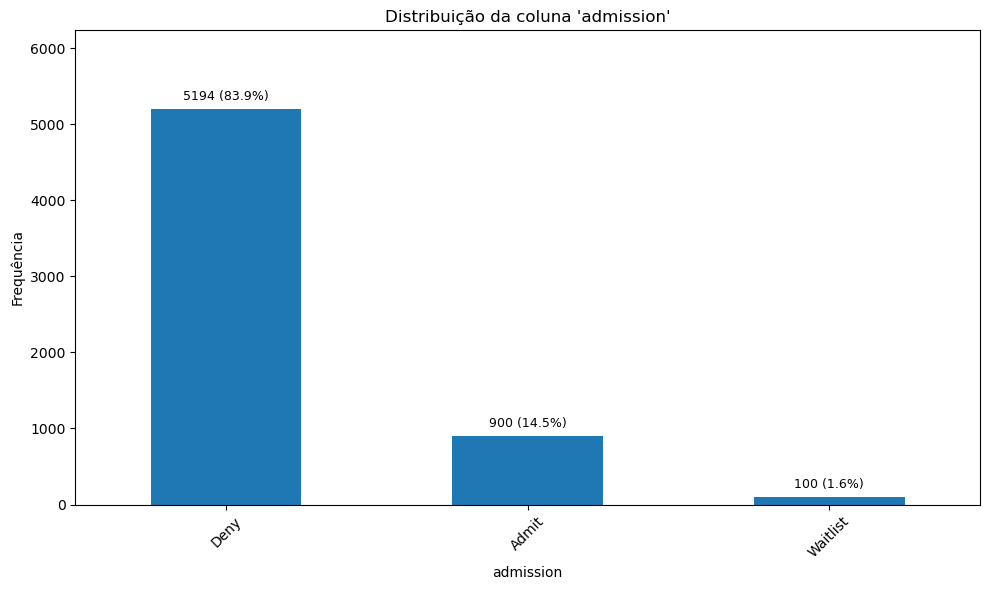

In [7]:
# Plotando gráfico de distribuição da variável 'admission' (variável target):

plot_bar('admission')

**Comentários:**
- Há 900 vagas para o MBA.
- São selecionados 100 para a lista de espera.
- O restante é negado ('Deny').

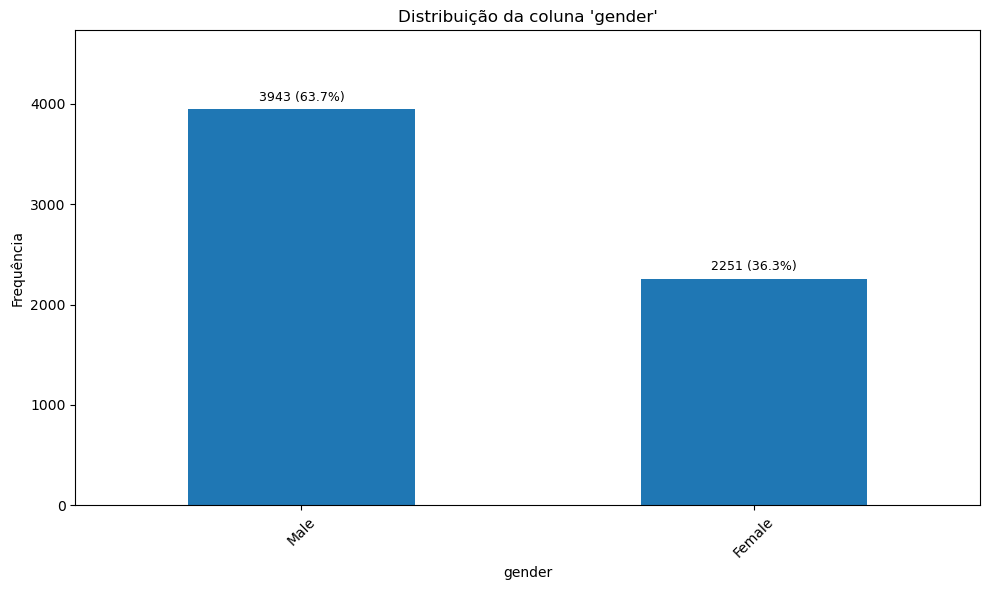

In [8]:
# Plotando gráfico de distribuição da variável 'gender':

plot_bar('gender')

**Comentários:**
- Temos uma diferença considerável no volume de aplicações por gênero (aproximadamente 7 homens para cada 4 mulheres).
- Vale observar futuramente se isso se reflete também na taxa de aprovação.

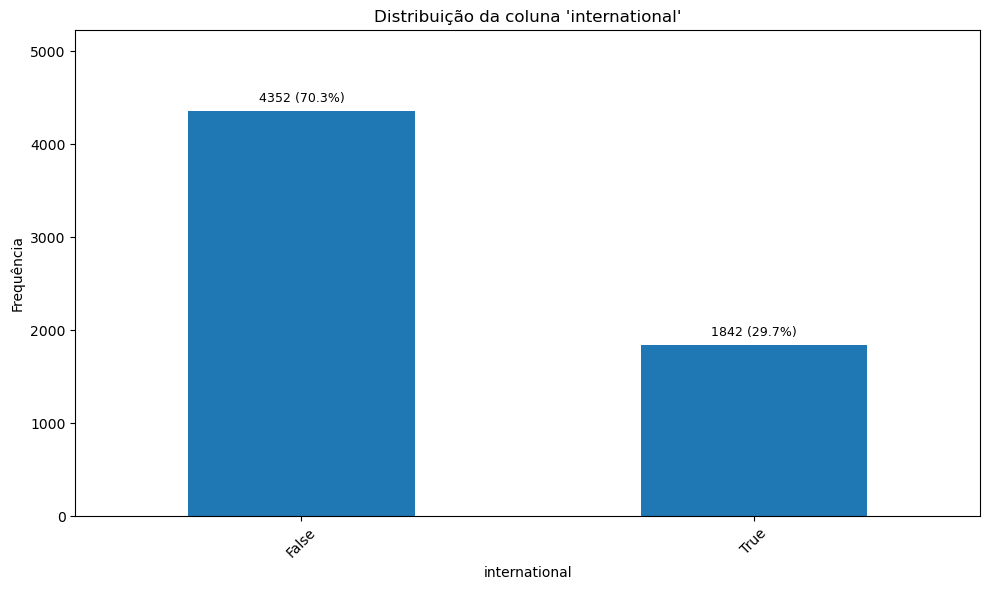

In [9]:
# Plotando gráfico de distribuição da variável 'international':

plot_bar('international')

**Comentários:**
- 30% dos candidatos vieram de outros países. Essa proporção me soa expressiva. Em uma breve pesquisa, vi que esse percentual para Harvard é de 27,2%. Ou seja, os 30% da nossa análise não parece atípico para os EUA.

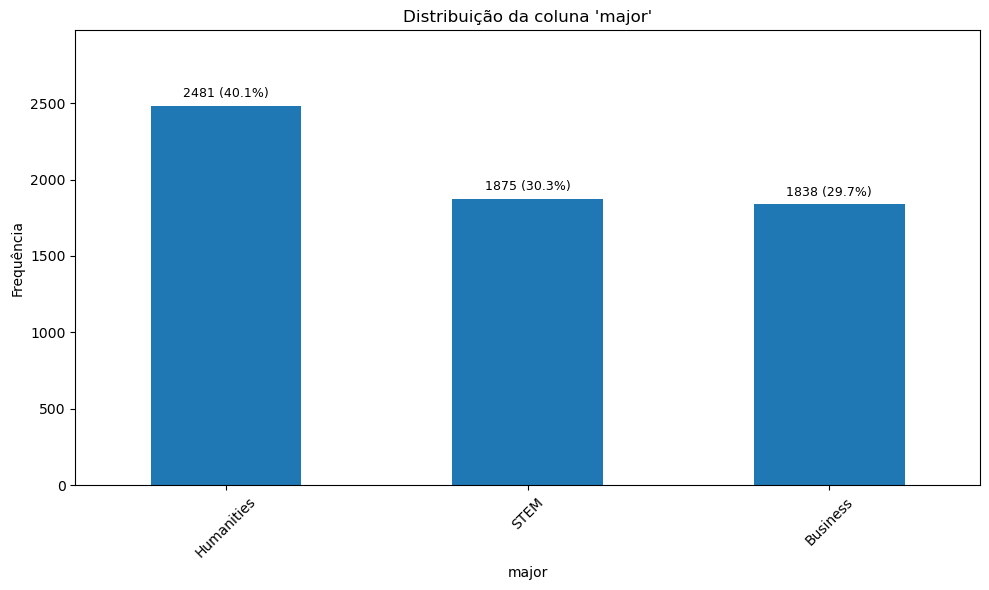

In [10]:
# Plotando gráfico de distribuição da variável 'major':

plot_bar('major')

**Comentários:**
- As áreas de conhecimento estão bem distribuídas, com ciências humanas tendo um pouco mais de aplicações. 

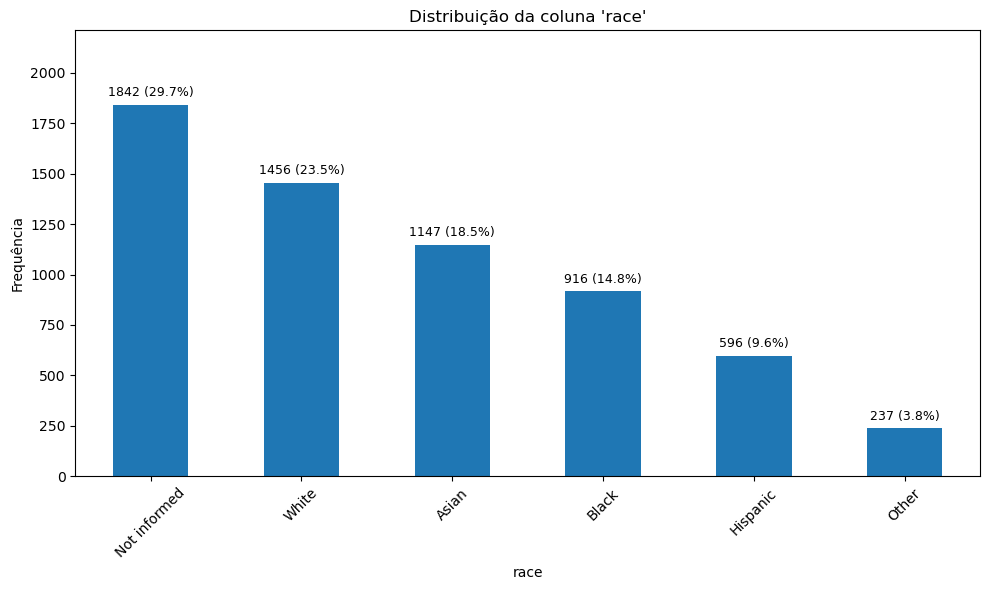

In [11]:
# Plotando gráfico de distribuição da variável 'race':

plot_bar('race')

**Comentários:**
- Há uma proporção relevante (30%) de pessoas que não informaram sua etnia.
- Ainda assim, os candidatos estão bem distribuídos entre diferentes etnias.

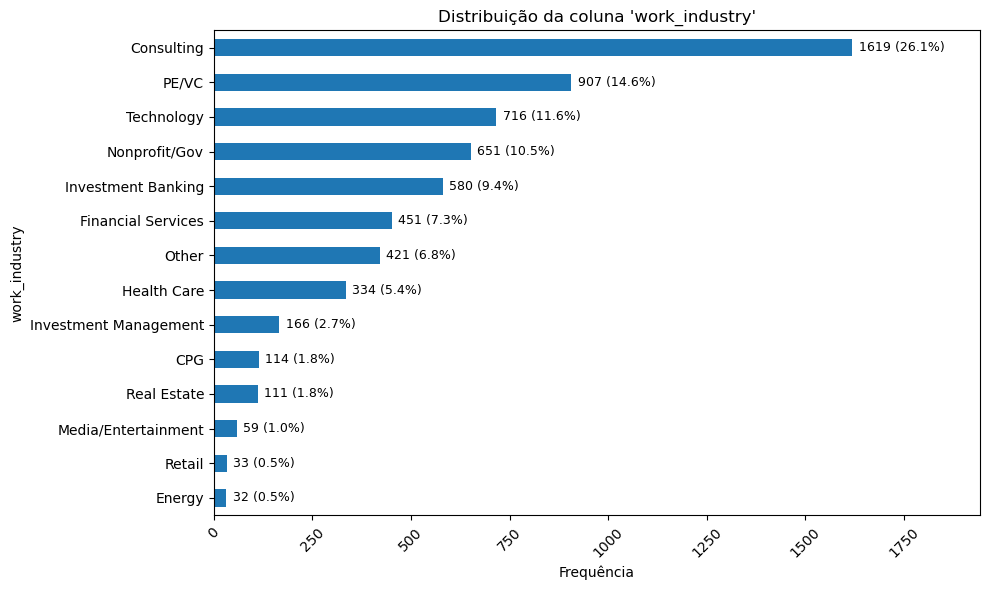

In [12]:
# Plotando gráfico de distribuição da variável 'work_industry':

plot_bar('work_industry')

**Comentários:**
- Quase 80% das aplicações estão centralizadas em 6 indústrias (Consulting, PE/VC, Technology, Nonprofit/Gov, Investiment Banking e Financial Services).

#### 3.1.2. Variáveis quantitativas

In [13]:
# Criando função para plotar histograma para cada variável quantitativa

def plot_hist(col):
    data = df[col].dropna()
    n = len(data)
    bins = math.ceil(math.log2(n) + 1) # Fórmula de Sturges
    
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=bins, edgecolor='black')

    plt.title(f"Distribuição da coluna '{col}'")
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

In [14]:
# Criando função para plotar boxplot para cada variável quantitativa

def plot_box(col):
    data = df[col].dropna()

    flierprops = dict(marker='o', markersize=3, markerfacecolor='red') 
    
    plt.figure(figsize=(10, 1.5))
    plt.boxplot(data, vert=False, patch_artist=True, flierprops=flierprops)
    
    plt.title(f"Boxplot da coluna '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

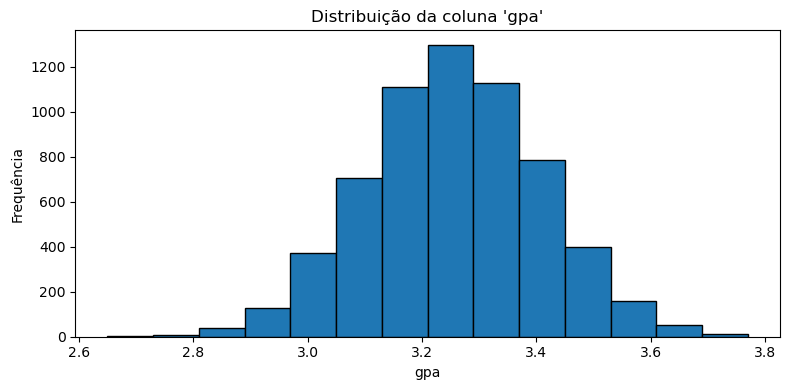

In [15]:
# Plotando histograma da variável 'gpa':

plot_hist('gpa')

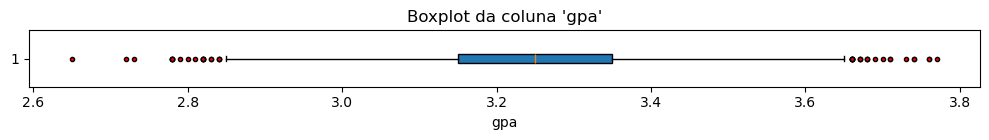

In [16]:
# Plotando boxplot da variável 'gpa':

plot_box('gpa')

**Comentários:**
- A distribuição de 'gpa' é bem simétrica.
- Há tanto outliers superiores quanto inferiores, o que é esperado em provas, testes e concursos.

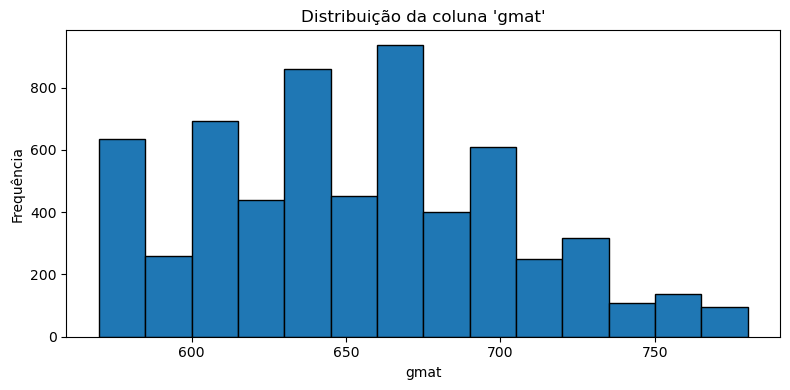

In [17]:
# Plotando histograma da variável 'gmat':

plot_hist('gmat')

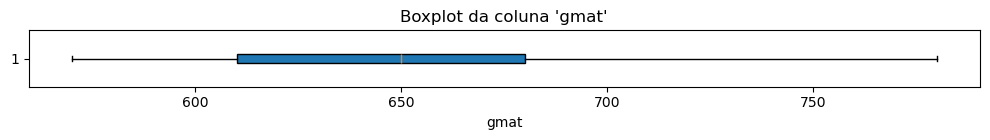

In [18]:
# Plotando boxplot da variável 'gmat':

plot_box('gmat')

**Comentários:**
- Distribuição assimétrica à direita.
- Não há outliers.

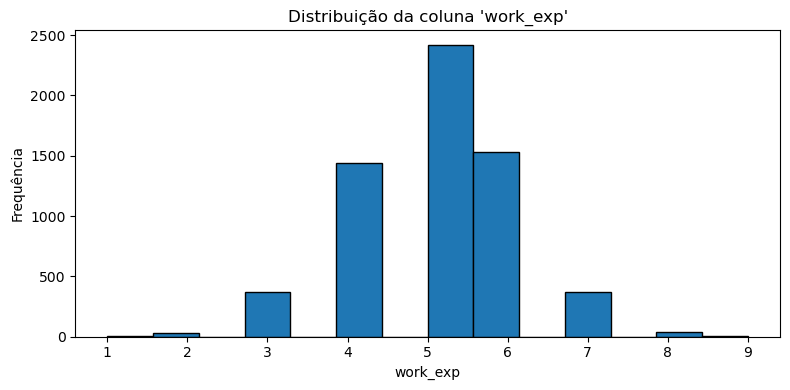

In [19]:
# Plotando histograma da variável 'work_exp':

plot_hist('work_exp')

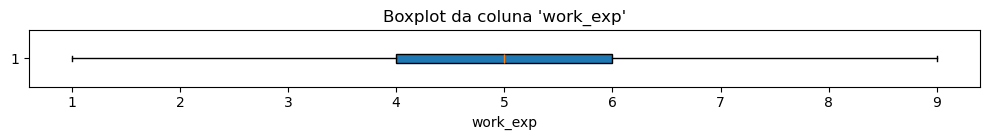

In [20]:
# Plotando boxplot da variável 'work_exp':

plot_box('work_exp')

**Comentários:**
- Distribuição simétrica.
- Não há outliers.

#### 3.1.3. Visão geral da análise univariada

A análise univariada nos ajudou a traçar um panorama geral do perfil dos candidatos ao MBA, explorando a distribuição individual de cada variável do conjunto de dados.

Entre os insights mais relevantes, destaca-se a **diferença expressiva na proporção de candidatos por gênero**: há quase o dobro de aplicações de homens em relação a mulheres. Isso pode indicar que o MBA desperta maior interesse no público masculino, seja por afinidade com os temas abordados, seja pela forma como o programa é comunicado. Também é válido considerar a existência de **barreiras implícitas (financeiras, culturais ou institucionais)** que possam dificultar a participação feminina no processo seletivo.

Nas demais variáveis, observamos:

- **GPA e GMAT** têm distribuições relativamente simétricas e centradas em torno da média, e, no caso do GPA, com presença de outliers em ambos os extremos.
- **Work experience** está concentrada entre 4 e 6 anos, sugerindo que a maioria dos candidatos já possui uma trajetória profissional sólida.
- Nas variáveis categóricas como **etnia**, **área de formação**, **nacionalidade** e **indústria de trabalho**, a distribuição é relativamente equilibrada, com destaque para a diversidade de setores de atuação profissional.

Embora a análise univariada, por natureza, não revele relações diretas com o resultado de admissão, ela é essencial para compreendermos a **composição e a variabilidade da base de dados**, funcionando como ponto de partida para investigações mais profundas nos próximos tópicos.

### 3.2. Análise bivariada

#### 3.2.1. Variável target ('admission') x Variáveis quantitativas

In [21]:
# Criando função para plotar gráfico de boxplot segmentado por 'admission'

def plot_box_by_admission(numeric_col):

    # Ordendo as categorias
    admission_order = ['Admit', 'Waitlist', 'Deny']

    # Definindo as cores das categorias
    admission_colors = {
        'Admit': 'green',
        'Waitlist': 'gold',
        'Deny': 'red'
    }
    
    # Filtrando o dataframe para manter apenas a coluna numérica e a de 'admission'
    data = df[[numeric_col, 'admission']]

    # Criando uma lista de grupos numéricos segmentados por cada categoria de 'admission'
    groups = [data[data['admission'] == c][numeric_col] for c in admission_order]
    
    # Definindo rótulos do eixo X
    labels = admission_order

    # Definindo propriedades dos outliers ("bolinhas")
    flierprops = dict(marker='o', markersize=3, markerfacecolor='red')

    # Criando a figura
    plt.figure(figsize=(8, 4))
    
    # Criando o boxplot
    box = plt.boxplot(groups, tick_labels=labels, patch_artist=True, flierprops=flierprops)

    # Aplicando cores às caixas
    for patch, label in zip(box['boxes'], labels):
        patch.set_facecolor(admission_colors.get(label, 'gray'))
  
    # Configurando parâmetros gerais
    plt.title(f"'{numeric_col}' por categoria de 'admission'")
    plt.xlabel('Admission')
    plt.ylabel(numeric_col)
    plt.tight_layout()
    plt.show()    

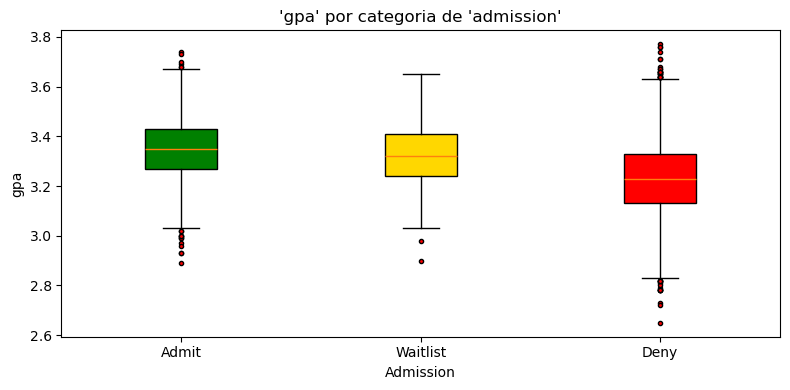

In [22]:
# Plotando boxplot de 'gpa' segmentados por 'admission':

plot_box_by_admission('gpa')

**Comentários:**
- No geral, as notas de GPA são maiores de quem foi aprovado, depois lista de espera, depois negado (comportamento esperado). Apesar de haver diferença, ela é pequena e pode não ser significante estatisticamente.
- Também observamos uma grande dispersão das notas nos grupos, especialmente entre aprovados e recusados, que apresentam tanto outliers inferiores quanto superiores.
- Essa dispersão e presença de outliers reforçam que, embora haja tendência, a variável isoladamente não é suficiente para prever a decisão de admissão com alta precisão.

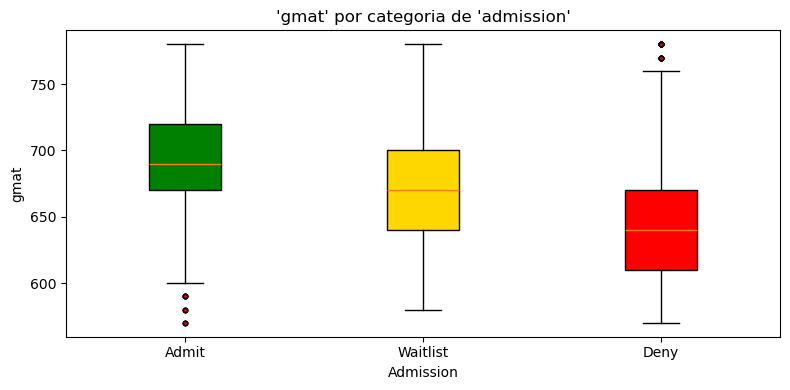

In [23]:
# Plotando boxplot de 'gmat' segmentados por 'admission':

plot_box_by_admission('gmat')

**Comentários:**
- Semelhante ao GPA, também vemos uma diferença geral nas notas dos aprovados, lista de espera e recusados, o que é esperado.
- Também vemos notas boas nos negados e notas ruins nos aprovados, indicando que o GMAT não deve ser o único critério de admissão.

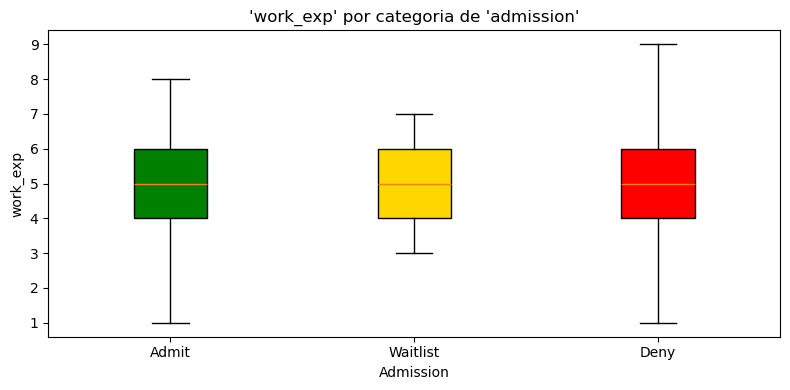

In [24]:
# Plotando boxplot de 'work_exp' segmentados por 'admission':

plot_box_by_admission('work_exp')

**Comentários:**
- Olhando pela diferença entre as categorias, work_exp não parece ter relação direta com a admissão no MBA. Tanto porque a maior parte dos dados se concentra entre 4 e 6 anos, independente das categorias, quanto porque há extremos tanto em admitidos quanto em negados.

#### 3.2.2. Variável target ('admission') x Variáveis qualitativas

In [25]:
# Criando função para plotar gráfico de barras segmentado por 'admission'

def plot_bar_crosstab(cat_col):
     
    crosstab = pd.crosstab(df[cat_col], df['admission'], normalize='index') * 100

    # Ordenando as categorias de 'admission'
    admission_order = ['Admit', 'Waitlist', 'Deny']
    crosstab = crosstab[admission_order]

    # Definindo as cores das categorias    
    admission_colors = {
    'Admit': 'green',
    'Waitlist': 'gold',
    'Deny': 'red'
    }
    colors = [admission_colors.get(col, 'gray') for col in admission_order]

    # Plotando os gráficos    
    if cat_col == 'work_industry':
        crosstab = crosstab.sort_values('Admit', ascending=True)
        ax = crosstab.plot(kind='barh', stacked=True, figsize=(10, 5), edgecolor='black', color=colors)
        plt.xlabel("Percentual (%)")
        plt.ylabel(cat_col)
    else:
        crosstab = crosstab.sort_values('Admit', ascending=False)
        ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 4), edgecolor='black', color=colors)
        plt.ylabel("Percentual (%)")
        plt.xlabel(cat_col)
        plt.xticks(rotation=45)
    
    # Adicionando rótulos nas colunas empilhadas    
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
               if cat_col == 'work_industry':
                   x = bar.get_x() + bar.get_width() / 2
                   y = bar.get_y() + bar.get_height() / 2
                   ax.text(x, y, f'{bar.get_width():.1f}%', ha='center', va='center', fontsize=8, color='white')
               else:
                    ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                        f'{height:.1f}%',
                        ha='center', va='center', fontsize=8, color='white')

    # Configurando parâmetros gerais    
    plt.title(f"Distribuição de 'admission' por '{cat_col}'")
    plt.legend(title='Admission', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

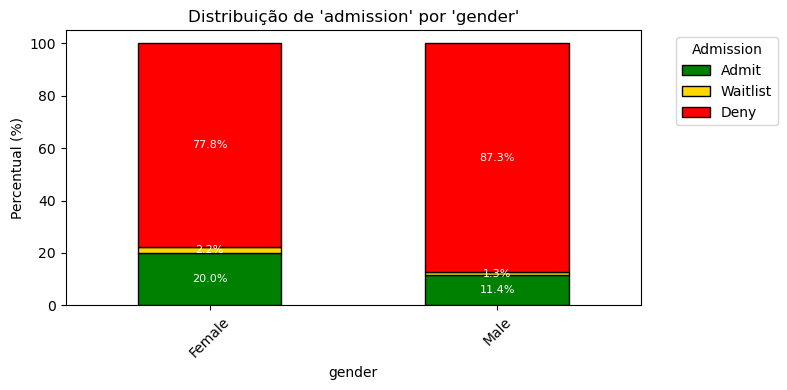

In [26]:
# Plotando gráfico de barras agrupadas de 'gender' segmentados por 'admission':

plot_bar_crosstab('gender')

**Comentários:**
- Aqui vemos algo relevante: a taxa de aprovação das mulheres é quase o dobro da dos homens. Isso pode significar uma maior performance real por parte delas ou ações institucionais para reduzir a discrepância entre gêneros.

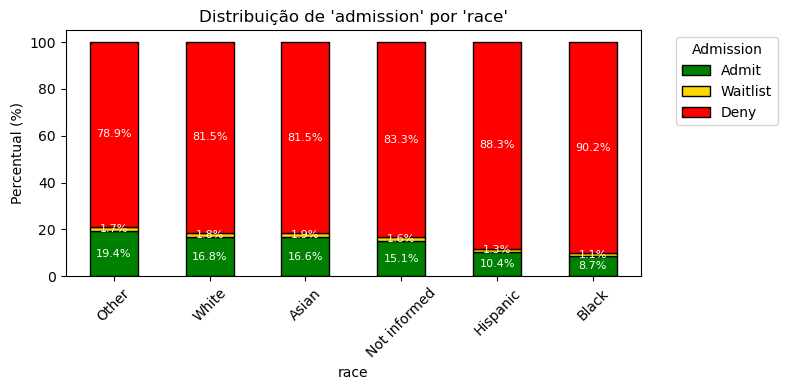

In [27]:
# Plotando gráfico de barras agrupadas de 'race' segmentados por 'admission':

plot_bar_crosstab('race')

**Comentários:**
- Minorias (hispânicos e pretos) possuem uma taxa de aprovação bem inferior a brancos, asiáticos e "outros". Isso pode indicar uma falta de sistemas de cotas raciais.

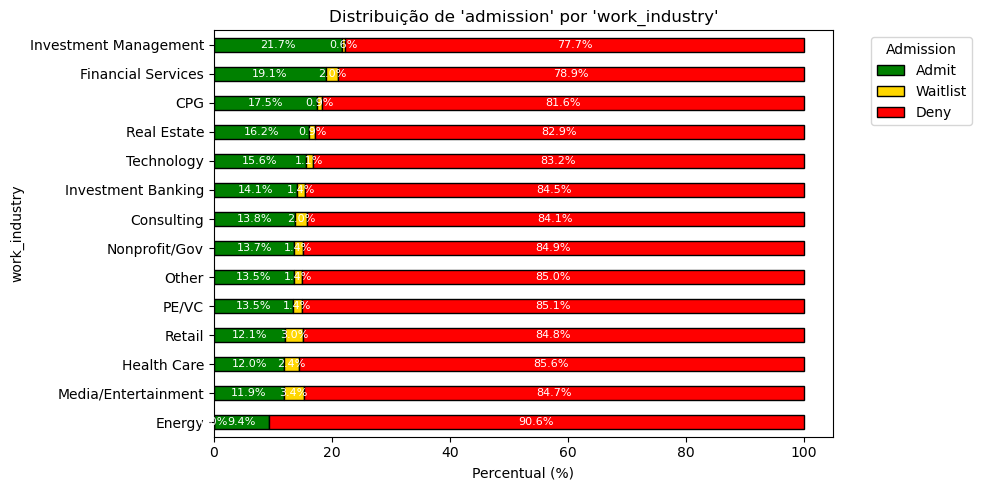

In [28]:
# Plotando gráfico de barras agrupadas de 'work_industry' segmentados por 'admission':

plot_bar_crosstab('work_industry')

**Comentários:**
- Neste gráfico, podemos perceber que a indústria dos candidatos parece ter uma relação mais direta com o resultado (muito mais do que o tempo de experiência). As indústrias "campeãs' (Investiment Management e Financial Services) tem quase o dobro da taxa de aprovação das menores (Media/Entertainment e Energy).
- Isso pode indicar maior afinidade de algumas indústrias aos temas do MBA (e à prova de GMAT).

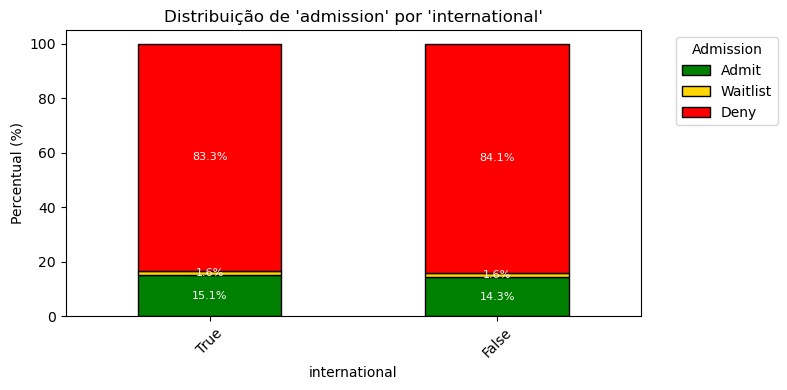

In [29]:
# Plotando gráfico de barras agrupadas de 'international' segmentados por 'admission':

plot_bar_crosstab('international')

**Comentários:**
- A diferença entre as taxas de aprovação de estudantes nacionais e internacionais é pequena, sugerindo que essa variável não tem muita relação com o resultado final. Uma outra hipótese é um possível sistema de cotas, onde estudantes internacionais não competem com os nacionais, mantendo uma taxa de aprovação igual entre os dois.

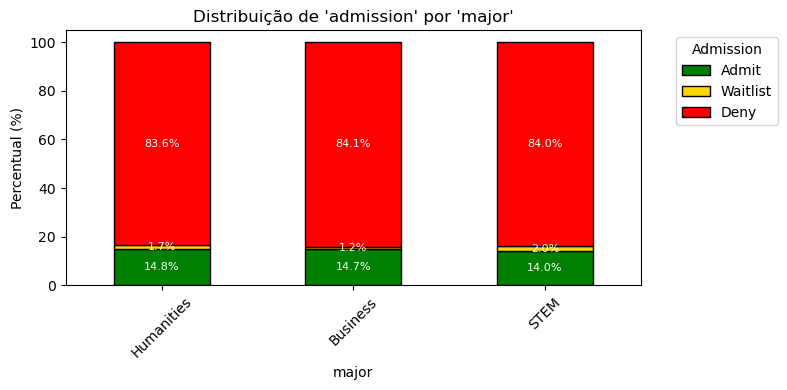

In [30]:
# Plotando gráfico de barras agrupadas de 'major' segmentados por 'admission':

plot_bar_crosstab('major')

**Comentários:**
- Aqui, vemos que a área de conhecimento ('major') também não parece ter relação com o resultado final. Uma hipótese plausível é que estudantes de diferentes áreas também não competem entre si.

#### 3.2.3. Gráficos de dispersão e cálculo de coeficiente de correlação

In [31]:
# Definindo a função para plotar gráfico de dispersão entre duas variáveis numéricas

def plot_scatter(x_col, y_col):

    plt.figure(figsize=(8, 5))

    plt.scatter(df[x_col], df[y_col], alpha=0.6, s=20)

    # Configurando parâmetros gerais
    
    plt.title(f"Dispersão: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

In [32]:
# Definindo a função para calcular o Coeficiente de Pearson entre duas variáveis numéricas

def correlacao(var_1, var_2):
    corr = df[var_1].corr(df[var_2], method='pearson')
    print(f"Correlação de Pearson entre {var_1} e {var_2}: {corr:.4f}")
    if 0.8 < abs(corr) <= 1:
        print("Correlação muito forte")
    elif 0.6 < abs(corr):
        print("Correlação forte")
    elif 0.4 < abs(corr):
        print("Correlação moderada")
    elif 0.2 < abs(corr):
        print("Correlação fraca")
    else:
        print("Correlação muito fraca")

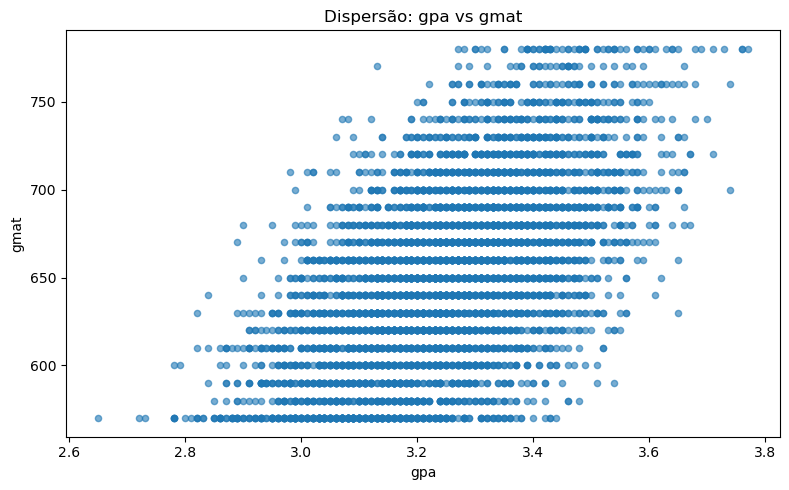

In [33]:
# Plotando gráfico de dispersão 'gpa' x 'gmat'

plot_scatter('gpa','gmat')

In [34]:
# Calculando o Coeficiente de Pearson entre 'gpa' e 'gmat'

correlacao('gpa','gmat')

Correlação de Pearson entre gpa e gmat: 0.5775
Correlação moderada


**Comentários:**
- O gráfico já sugere a existência de uma correlação positiva entre GPA e GMAT.
- Ao calcular o Coeficiente de Pearson, vemos que de fato há uma correlação moderada. Isso indica que alunos tendem a ter comportamentos similares no GPA ou GMAT. Um bom aluno tende a tirar notas boas nas duas variáveis, assim como um aluno ruim tende a não ir bem nas duas variáveis.

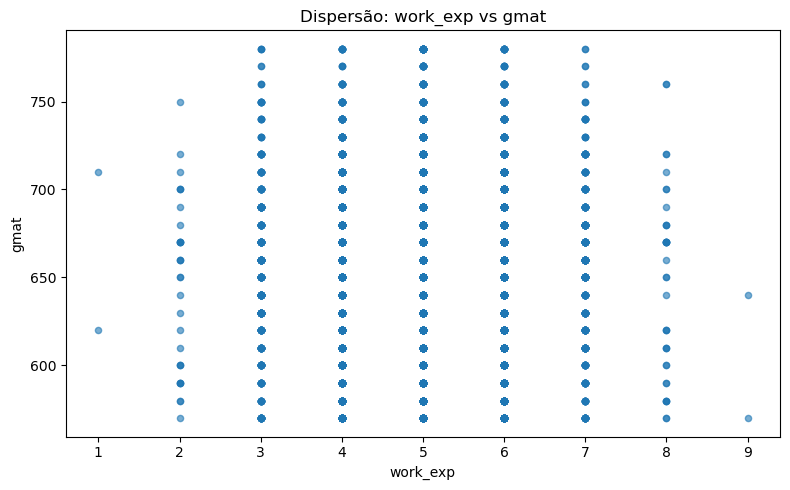

In [35]:
# Plotando gráfico de dispersão 'work_exp' x 'gmat'

plot_scatter('work_exp','gmat')

In [36]:
# Calculando o Coeficiente de Pearson entre 'work_exp' e 'gmat'

correlacao('work_exp','gmat')

Correlação de Pearson entre work_exp e gmat: -0.0010
Correlação muito fraca


**Comentários:**
- Não enxergamos relação nenhuma no tempo de experiência com o desempenho do aluno no GMAT.

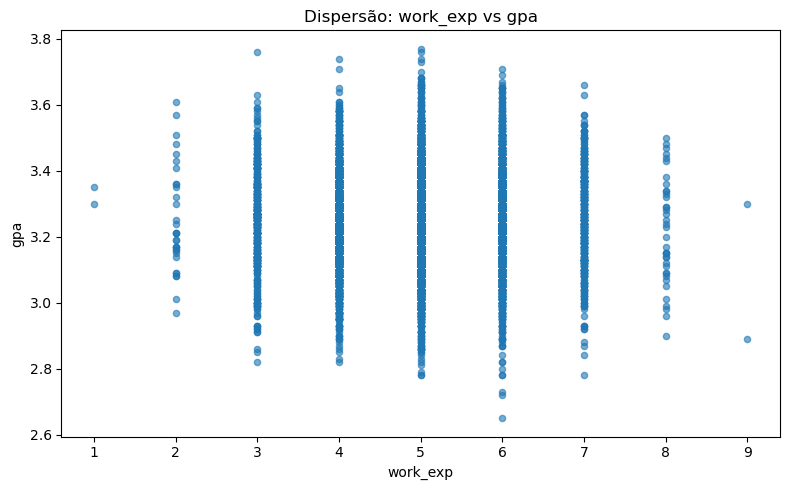

In [37]:
# Plotando gráfico de dispersão 'work_exp' x 'gpa'

plot_scatter('work_exp','gpa')

In [38]:
# Calculando o Coeficiente de Pearson entre 'work_exp' e 'gpa'

correlacao('work_exp','gpa')

Correlação de Pearson entre work_exp e gpa: 0.0003
Correlação muito fraca


**Comentários:**
- Novamente, não enxergamos relação nenhuma no tempo de experiência com o desempenho do aluno no GPA.

#### 3.2.4. Visão geral da análise bivariada

A análise bivariada nos permitiu entender como cada variável individualmente se relaciona com o resultado de admissão no MBA. 


**Variáveis quantitativas x 'admission':**
- **GPA e GMAT** apresentaram relação direta com a admissão: candidatos aprovados, em média, possuem notas mais altas.
- Apesar disso, há exceções importantes: há candidatos com notas altas que foram negados e vice-versa. Isso indica que essas variáveis **não são os únicos critérios de seleção**.
- **Work experience**, por outro lado, mostrou **pouca variação entre os grupos**, sugerindo nenhuma (ou baixíssima) relação com o resultado final.
  

**Variáveis qualitativas x 'admission':**

- **Gênero:** mulheres apresentaram uma taxa de aprovação significativamente maior do que homens. Isso pode refletir maior desempenho, alinhamento com os critérios avaliados ou até ações institucionais para maior equidade de gênero.
- **Etnia:** minorias como pretos e hispânicos tiveram taxas de aprovação mais baixas, o que pode indicar ausência de ações afirmativas ou refletir desigualdades estruturais.
- **Indústria de trabalho:** foi uma das variáveis qualitativas com maior poder explicativo. Candidatos de setores como *Investment Management* e *Financial Services* tiveram taxas de aprovação muito superiores a setores como *Media/Entertainment* e *Energy*. Isso pode estar ligado à afinidade dessas áreas com os temas centrais do MBA.
- **Área de formação ('major')** e **nacionalidade ('international')** não apresentaram diferenças relevantes entre os grupos, sugerindo pouca relação de forma isolada.
  

**Correlações entre variáveis numéricas:**

- **GPA e GMAT** apresentaram **correlação positiva moderada**, indicando que bons alunos tendem a ter bom desempenho em ambas as métricas, o que reforça a ideia de um perfil consistente de performance.
- **Work experience** não apresentou correlação significativa com nenhuma das outras variáveis quantitativas, reforçando a percepção de que seu impacto é limitado neste processo seletivo.


Em resumo, a análise bivariada revelou que **não há uma única variável que explique completamente a admissão**, mas algumas delas - como GMAT, GPA, gênero e indústria de atuação - já demonstram certo poder discriminativo. A próxima etapa será explorar combinações de variáveis para identificar padrões mais robustos.

### 3.3. Análise multivariada

#### 3.3.1. Gráficos de dispersão segmentados pela variável target ('admission')

In [39]:
# Definindo a função para plotar gráfico de dispersão entre duas variáveis numéricas, segmentado por 'admission'

def plot_scatter_by_admission(x_col, y_col):

    # Definindo cores por categoria
    admission_colors = {
        'Admit': 'green',
        'Waitlist': 'gold',
        'Deny': 'red'
    }
    
    plt.figure(figsize=(8, 5))

    # Plotando cada grupo de 'admission' separadamente
    for category in df['admission'].unique():
        subset = df[df['admission'] == category]
        plt.scatter(subset[x_col], subset[y_col],
                    label=category,
                    alpha=0.6,
                    s=20,
                    color=admission_colors.get(category, 'gray'))

    # Configurando parâmetros gerais
    plt.title(f"Dispersão: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Admission')
    plt.tight_layout()
    plt.show()

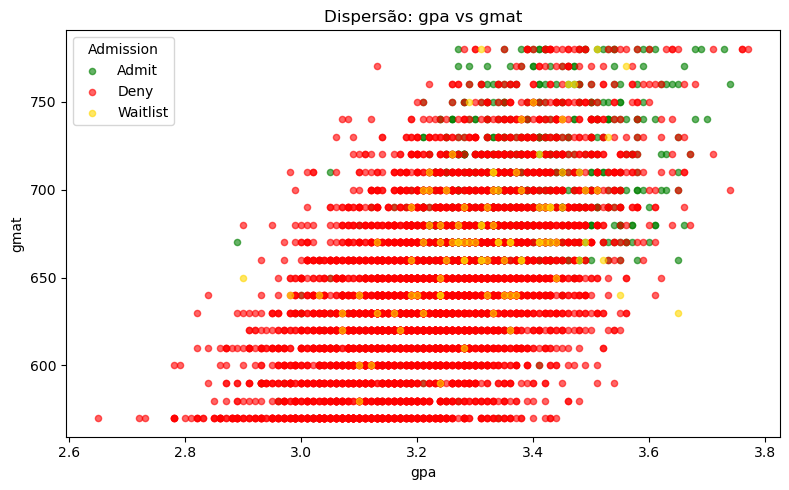

In [40]:
# Plotando gráfico de dispersão 'gpa' x 'gmat', segmentado por 'admission'

plot_scatter_by_admission('gpa','gmat')

**Comentários:**
- Esse gráfico evidencia ainda mais que o GPA e o GMAT possuem relações mais diretas com a aprovação dos candidatos.
- Entretanto, o fato de haver alguns pontos aprovados com menores notas (por exemplo, o ponto verde à esquerda) reforçam que possivelmente GPA e GMAT não são os únicos critérios.

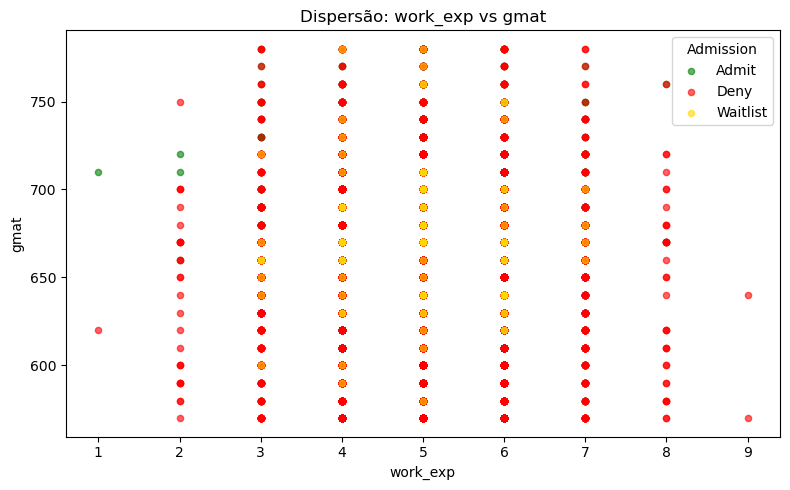

In [41]:
# Plotando gráfico de dispersão 'work_exp' x 'gmat', segmentado por 'admission'

plot_scatter_by_admission('work_exp','gmat')

**Comentários:**
- Curiosamente, neste gráfico, observamos que boa parte dos candidatos aprovados (pontos verdes) possui menos de 2 anos de experiência profissional, mesmo apresentando notas altas no GMAT.
- Esse padrão reforça a ideia de que a admissão valoriza fortemente a performance na prova, contrariando a expectativa comum de que mais tempo de mercado aumentaria as chances de aprovação.
- Uma hipótese é que candidatos com menos experiência tenham conseguido dedicar mais tempo à preparação para o GMAT, o que pode ter contribuído para seus bons resultados.

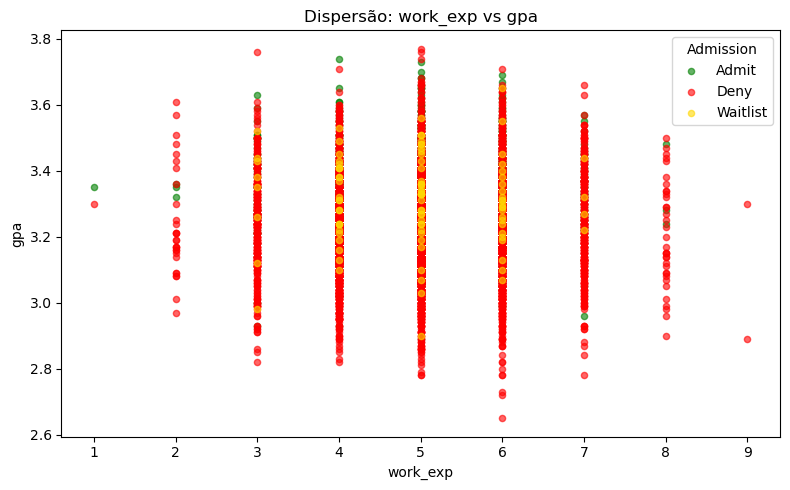

In [42]:
# Plotando gráfico de dispersão 'work_exp' x 'gpa', segmentado por 'admission'

plot_scatter_by_admission('work_exp','gpa')

**Comentários:**
- Este gráfico reforça os padrões já observados nas análises anteriores: entre os candidatos aprovados, um bom desempenho acadêmico (GPA) aparece com frequência, independentemente do tempo de experiência profissional.

#### 3.3.2. Visão geral da análise multivariada

Na análise multivariada, exploramos como duas variáveis numéricas se combinam na relação com o status de admissão. Para isso, utilizamos gráficos de dispersão com a variável 'admission' segmentada por cores.

Um dos achados mais interessantes surgiu ao cruzarmos **Work Experience e GMAT**: diversos candidatos aprovados aparecem concentrados na faixa de **menos de 2 anos de experiência profissional**, mas com **notas elevadas no GMAT**. Esse padrão contraria a expectativa comum de que mais tempo de mercado aumenta as chances de aprovação e reforça a hipótese de que a performance na prova tem peso decisivo. Uma possível explicação é que candidatos com menos experiência puderam dedicar mais tempo à preparação.

Ao analisarmos **GPA e GMAT** juntos, reforçamos um padrão já visto anteriormente: candidatos aprovados tendem a se concentrar na região de notas mais altas. No entanto, a presença de exceções (aprovados com notas medianas ou até baixas) demonstra que o comitê de admissão parece considerar múltiplos critérios além do desempenho acadêmico e a prova de admissão.

Por fim, o cruzamento entre **Work Experience e GPA** validou mais uma vez os achados anteriores: bons níveis de GPA aparecem entre os aprovados com diferentes níveis de experiência, indicando que o tempo de mercado **não é um critério eliminatório** e que o desempenho acadêmico pode compensar trajetórias profissionais mais curtas.

Em resumo, a análise multivariada revelou que a admissão parece estar diretamente relacionada com **GPA e GMAT**, enquanto o **tempo de experiência profissional tem impacto reduzido ou nulo**. Ao combinar variáveis, conseguimos identificar **padrões mais sutis e nuançados** que passariam despercebidos em análises isoladas.


## 4. Principais insights e conclusões

Com base na análise exploratória dos dados de admissão, destacam-se os seguintes aprendizados:

- **Performance acadêmica e quantitativa** (GPA e GMAT) é um dos fatores mais fortemente associados à admissão. Candidatos aprovados concentram-se nas faixas mais altas dessas métricas, embora existam exceções (o que indica que esses critérios, embora relevantes, não são únicos).

- **Work experience**, por outro lado, mostrou ter baixa relação com o resultado final tanto isoladamente quanto em combinação com outras variáveis.

- Entre as **variáveis qualitativas**, o destaque vai para:
  - **Gênero**: mulheres apresentaram uma taxa de aprovação significativamente maior.
  - **Indústria de atuação**: setores como Investment Management e Financial Services têm taxas de sucesso muito superiores a outros.
  - **Etnia** e **nacionalidade** também exibem padrões interessantes, ainda que menos marcantes.

- As análises multivariadas reforçaram que **bons resultados no GMAT e GPA podem compensar um tempo reduzido de mercado**, evidenciando o peso do desempenho acadêmico no processo seletivo.

Essa análise serviu como base para formular hipóteses e entender melhor o comportamento dos dados. 

Ela também abre caminho para testes mais objetivos em fases futuras do projeto. Dado o padrão multifatorial e a presença de exceções, uma próxima etapa natural seria a construção de um **modelo preditivo supervisionado** (como uma Decision Tree ou Logistic Regression), para identificar o peso relativo de cada variável e predizer admissões com maior precisão.